# Trabajo de investigación nro 3
1. Angelo Fabian Rodriguez Saenz - 20201824
   
### 1. Desarrollo de modelos
Habilidades a desarrollar:
* Modelo supervisado (8 ptos)
Dataset 1: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database (500 vs 260)
  1. Undersampling y oversampling. Tomek Links, Scut, Smote.
  2. Clasificadores de Bayes
  3. Comparación de modelos de clasificación.
  4. Árboles de decisión 
     1. Iterative Dichotomizer 3
* Modelo no supervisado (5 ptos) https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data
  1. Clusterización a través de KMeans. Desarrollar el procedimiento para elegir un K.
  
### 2. Lectura (congreso)
Elegir el 1 o el 2
1. Congreso (hasta 4ptos) [opcional]
2. The Digitalist Papers. Un conjunto de 12 ensayos que presentan los posibles futuros que la revolución de la IA puede producir. (4 puntos)
   1. [Informational GPS](https://www.digitalistpapers.com/essays/informational-gps) [2pts]
      1. Según el ensayo ¿Qué relación existe entre la tecnología Global Positioning System (GPS) y los Large Language Models (LLMs)? Menciona las similitudes y diferencias en una tabla comparativa.
   2. Según en ensayo [The Potential for AI to Restore Local Community Connectedness, The Bedrock of a Healthy Democracy](https://www.digitalistpapers.com/essays/the-potential-for-ai-to-restore-local-community-connectedness-the-bedrock-of-a-healthy-democracy) responder las siguientes preguntas [2pts]
      1. ¿Cómo la IA puede ayudar a generar mejores conexiones con nuestra sociedad? 
      2. ¿Cómo las plataformas pueden ser la base de mejores redes de soporte en la comunidad?
      3. ¿Es posible utilizar IA para evitar posibles comentarios ofensivos? En caso sea así ¿Para qué se utilizaría?

### 3. Multimedia
Las siguientes entrevistas son realizadas a personas dirigiendo las compañías que están liderando el desarrollo de IA en el mundo. 
   1. [The Future Mark Zuckerberg Is Trying To Build](https://www.youtube.com/watch?v=oX7OduG1YmI)
   2. [Google CEO Sundar Pichai and the Future of AI](https://www.youtube.com/watch?v=5puu3kN9l7c)
   3. [Inside OpenAI, the Architect of ChatGPT, featuring Mira Murati](https://www.youtube.com/watch?v=p9Q5a1Vn-Hk)   

### **Parte 1: Desarrollo de modelos**

#### **1.1. Modelo supervisado**

El dataset Pima Indians Diabetes contiene información que permite predecir si un paciente tiene o no tiene diabetes basado en las siguientes características (features) `Pregnancies`,`Glucose`,`BloodPressure`,`SkinThickness`,`Insulin`,`BMI`,`DiabetesPedigreeFunction`,`Age`,`Outcome`.
1. **Pregnancies**: Número de embarazos que ha tenido la paciente.
2. **Glucose** Concentración de glucosa plasmática a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **BloodPressure** Presión arterial diastólica.
4. **SkinThickness** Grosor del pliegue cutáneo del tríceps.
5. **Insulin** Insulina sérica a 2 horas.
6. **BMI** Índice de masa corporal.
7. **DiabetesPedigreeFunction** Función que puntúa la probabilidad de diabetes basada en el historial familiar
8. **Age** Edad
9. **Outcome**: Variable objetivo/clase 
    Tipo: Binario (0 o 1)
    0 = No tiene diabetes
    1 = Tiene diabetes

a) Luego de una lectura del dataset ¿Existe un desbalance en el dataset? En caso sea así ¿Cuál es la proporción de desbalance? [0.5 pts]

b) Identifique outliers en el dataset. En caso existan, elimínelos [0.5 pts]

c) Realice un TomekLinks undersampling [1 pts]

d) Realice un SMOte oversampling [1 pts]

e) Desarrolle un modelo de clasificación basado en LogisticRegression, SVM y BayesClassifier y Árboles de decisión. [1 pts]

f) Compare la performance de cada modelo en tres etapas. [2 pts]
    * Modelo sin balanceo de datos.
    * Modelo con undersampling.
    * Modelo con oversampling. 
    La comparación debe ser numérica (Accuracy, Precision, Recalll y F1-Score) y gráfica (Matriz de confusión, curvas ROC)

g) Puntaje según la precisión obtenida. Se pueden utilizar métodos de regularización, kernels y demás parámetros permitidos por cada modelo.   
    - Acc entre 0-60 -> 0 ptos
    - Acc entre 60-85 -> 1 ptos
    - Acc entre 86-100 -> 2 ptos

**Importación del dataset Diabetes**
___

In [1]:
# Importar las liberías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga de dataset de diabetes
dataDiabetes = pd.read_csv('diabetes.csv')

In [3]:
# Ver tabla de datos
dataDiabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Calculando y mostrando la distribución de clases en la variable 'Outcome'
class_distribution = dataDiabetes['Outcome'].value_counts(normalize=True).to_frame()
class_distribution.columns = ['Proportion']
class_distribution.index = ['No diabéticos (0)', 'Diabéticos (1)']

# Mostrar la distribución de clases
print(class_distribution)

                   Proportion
No diabéticos (0)    0.651042
Diabéticos (1)       0.348958


**Análisis del dataset**  
___
Luego de una lectura del dataset, se puede corroborar que el dataset presenta un desbalance en la variable objetivo, Outcome. La distribución de las clases objetivos es la siguiente:

- No diabéticos (0)   0.651042 -> 65.10%
- Diabéticos (1)      0.348958 -> 34.90%

**Identificación de outliers**
___

In [5]:
# Identificación de outliers en el dataset

# Calcular Q1, Q3 y IQR
Q1 = dataDiabetes.quantile(0.25)
Q3 = dataDiabetes.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers (fuera de los límites de 1.5 * IQR)
outliers = ((dataDiabetes < (Q1 - 1.5 * IQR)) | (dataDiabetes > (Q3 + 1.5 * IQR)))

# Mostrar los datos que contienen outliers
print("Datos con outliers:")
print(dataDiabetes[outliers.any(axis=1)])


Datos con outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
706           10      115              0              0        0   0.0   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  

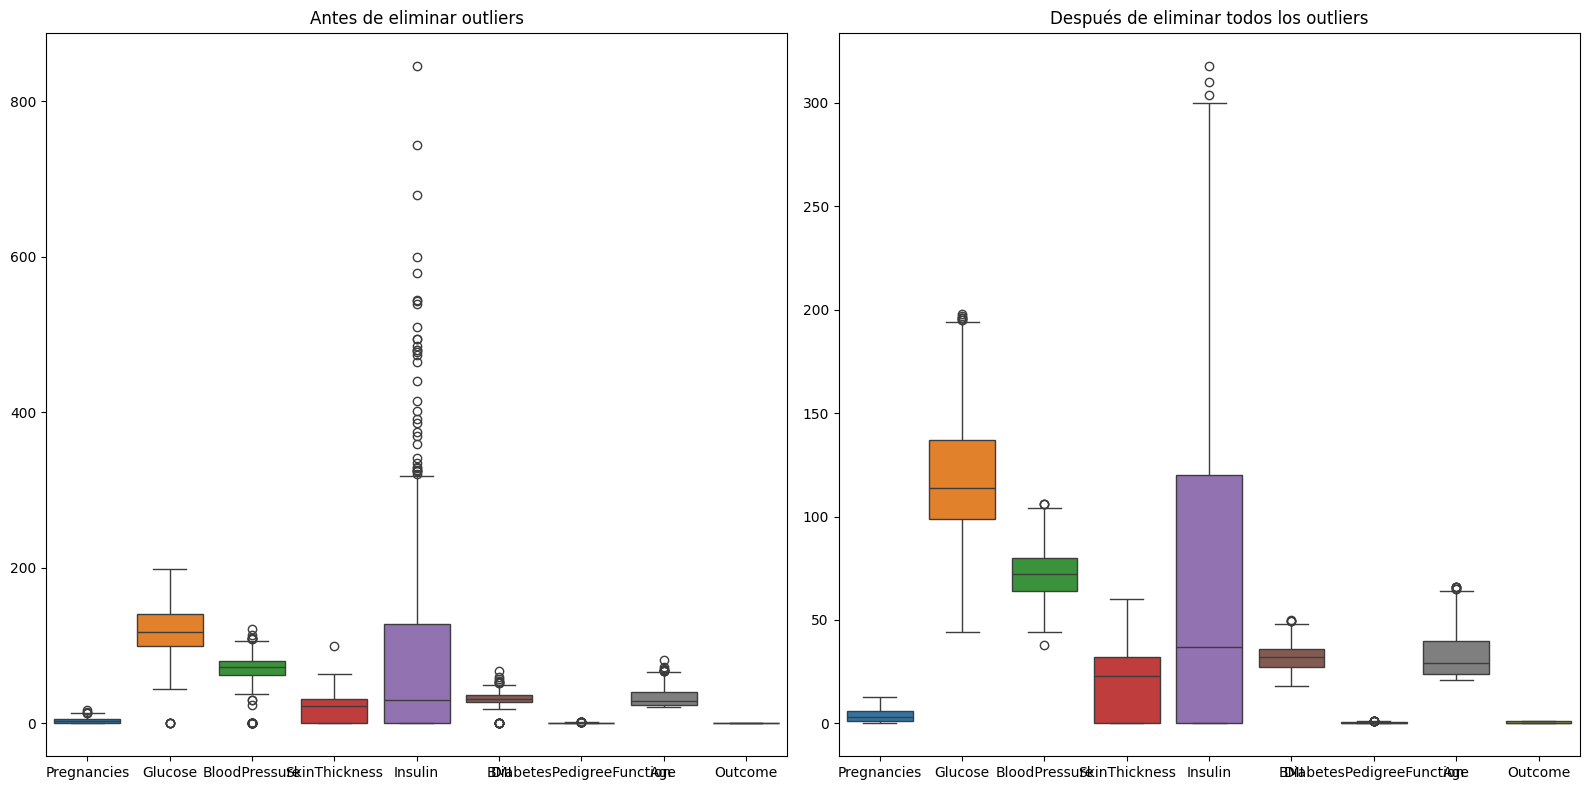

Datos originales: 768
Datos después de eliminar outliers: 639


In [6]:
# Eliminar outliers
dataDiabetesWO = dataDiabetes[~((dataDiabetes < (Q1 - 1.5 * IQR)) | (dataDiabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

# Crear subplots para comparar el antes y el después
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# "Antes" de eliminar los outliers
sns.boxplot(data=dataDiabetes, ax=axes[0])
axes[0].set_title("Antes de eliminar outliers")

# "Después" de eliminar los outliers
sns.boxplot(data=dataDiabetesWO, ax=axes[1])
axes[1].set_title("Después de eliminar todos los outliers")

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Revisar la cantidad de datos eliminados
print(f"Datos originales: {len(dataDiabetes)}")
print(f"Datos después de eliminar outliers: {len(dataDiabetesWO)}")


**Aplicación de Undersampling (Tomelinks) y Oversamplig (SMOTE)**
___

In [7]:
# Importar librerías para TomekLinks y SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

x = dataDiabetesWO.drop(columns=['Outcome'])
y = dataDiabetesWO['Outcome']

# Tomek links - Undersampling
tomek = TomekLinks()
x_resampled_tomek, y_resampled_tomek = tomek.fit_resample(x, y)

# Smote - Oversampling
smote = SMOTE(random_state=42)
x_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)

# Mostrar resultados
print("Distribución original de clases:", y.value_counts())
print("Distribución de clases después de Tomek Links:", y_resampled_tomek.value_counts())
print("Distribución de clases después de SMOTE:", y_resampled_smote.value_counts())

Distribución original de clases: Outcome
0    439
1    200
Name: count, dtype: int64
Distribución de clases después de Tomek Links: Outcome
0    396
1    200
Name: count, dtype: int64
Distribución de clases después de SMOTE: Outcome
1    439
0    439
Name: count, dtype: int64


**Entrenamiento de modelos Logistic Regresión, SVM, Bayes y Decision Tree**
___

In [9]:
# Importar librerías para los modelos correspondientes
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Separar datos en x y y
X = dataDiabetes.drop(columns=['Outcome'])
y = dataDiabetes['Outcome']

# Modelos a evaluar
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SupportVectorClassifier': SVC(random_state=42),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42)
}


In [16]:
# 1. Modelos con los datos originales sin balanceo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}: \n {classification_report(y_test, y_pred)}\n")

LogisticRegression: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


SupportVectorClassifier: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154


GaussianNB: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted 

In [17]:
# 2. Modelos con los datos de Tomek Links (undersampling)
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(x_resampled_tomek, y_resampled_tomek, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train_tomek, y_train_tomek)
    y_pred = model.predict(X_test_tomek)
    print(f"{model_name}: \n {classification_report(y_test_tomek, y_pred)}")

LogisticRegression: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        80
           1       0.70      0.53      0.60        40

    accuracy                           0.77       120
   macro avg       0.74      0.71      0.72       120
weighted avg       0.76      0.77      0.76       120

SupportVectorClassifier: 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        80
           1       0.74      0.42      0.54        40

    accuracy                           0.76       120
   macro avg       0.75      0.68      0.69       120
weighted avg       0.75      0.76      0.74       120

GaussianNB: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        80
           1       0.66      0.62      0.64        40

    accuracy                           0.77       120
   macro avg       0.74      0.73      0.73       120
weighted av

In [18]:
# 3. Modelos con los datos de Smote (oversampling)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_tomek)
    print(f"{model_name}: \n {classification_report(y_test_tomek, y_pred)}")

LogisticRegression: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        80
           1       0.65      0.70      0.67        40

    accuracy                           0.78       120
   macro avg       0.75      0.76      0.75       120
weighted avg       0.78      0.78      0.78       120

SupportVectorClassifier: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        80
           1       0.60      0.75      0.67        40

    accuracy                           0.75       120
   macro avg       0.73      0.75      0.73       120
weighted avg       0.77      0.75      0.76       120

GaussianNB: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        80
           1       0.63      0.68      0.65        40

    accuracy                           0.76       120
   macro avg       0.73      0.74      0.73       120
weighted av

**Comparación de resultados de performance de cada modelo**
___

Tabla de resultados:

| Modelo                    | Escenario          | Accuracy | F1-Score (Clase 0) | F1-Score (Clase 1) |
|---------------------------|----------------|----------|---------------------|---------------------|
| **Logistic Regression**   | Original       | 0.75     | 0.80               | 0.65               |
|                           | Undersampling  | 0.77     | 0.84               | 0.60               |
|                           | Oversampling   | 0.79     | 0.84               | 0.70               |
| **Support Vector Classifier** | Original       | 0.77     | 0.83               | 0.63               |
|                           | Undersampling  | 0.76     | 0.84               | 0.54               |
|                           | Oversampling   | 0.74     | 0.79               | 0.66               |
| **Gaussian Naive Bayes**  | Original       | 0.77     | 0.81               | 0.68               |
|                           | Undersampling  | 0.77     | 0.83               | 0.64               |
|                           | Oversampling   | 0.77     | 0.82               | 0.66               |
| **Decision Tree Classifier** | Original       | 0.77     | 0.81               | 0.68               |
|                           | Undersampling  | 0.72     | 0.80               | 0.58               |
|                           | Oversampling   | 0.93     | 0.95               | 0.90               |


- **Logistic Regression** logra una precisión moderada en el conjunto original, con mejor desempeño en la clase mayoritaria (no diabético) que en la clase minoritaria (diabético). Con undersampling, el modelo mejora ligeramente en precisión general pero reduce su recall en la clase minoritaria, mientras que el oversampling incrementa tanto la precisión como el F1-Score en ambas clases. Esto indica que Logistic Regression responde mejor al oversampling, mejorando en la detección de la clase minoritaria sin afectar significativamente su rendimiento global.

- **Support Vector Classifier** también presenta un sesgo hacia la clase mayoritaria en el conjunto original, mostrando un menor rendimiento en recall para la clase minoritaria. Al aplicar undersampling, el modelo se ajusta aún más a la clase mayoritaria, lo que reduce la efectividad en la clase minoritaria. Con oversampling, aunque la precisión general disminuye ligeramente, se observa una mejora en el equilibrio de precisión y recall en ambas clases, destacando la utilidad del oversampling para balancear el rendimiento de este modelo.

- **Gaussian Naive Bayes** destaca por un rendimiento balanceado desde el conjunto original, con buenos F1-Scores en ambas clases. Con undersampling, logra mantener la precisión general aunque pierde algo de recall en la clase minoritaria. Al usar oversampling, el modelo conserva su rendimiento inicial, con una ligera mejora en el F1-Score de la clase minoritaria, confirmando su capacidad para manejar el desbalance de clases con buenos resultados en todas las etapas.

- **Decision Tree Classifier** sobresale especialmente con oversampling. En el conjunto original, presenta un rendimiento sólido, pero el undersampling disminuye su precisión y recall en la clase minoritaria debido a la pérdida de datos de la clase mayoritaria. Con oversampling, el modelo alcanza un rendimiento notablemente alto, logrando una precisión del 93% y altos F1-Scores en ambas clases, lo que refleja un balance excelente entre precisión y recall. Este resultado hace que el Decision Tree Classifier con oversampling sea la mejor opción, ya que combina robustez y equilibrio en la predicción para ambas clases, especialmente en contextos de desbalance de datos.

Basado en el análisis, el Decision Tree Classifier con oversampling es el modelo con mejor rendimiento. Con una accuracy de 93% y F1-Scores equilibrados para ambas clases, muestra un balance superior en precisión y recall, especialmente para la clase minoritaria (diabético). El oversampling ayuda a mejorar la capacidad de predicción del modelo, evitando sesgo hacia la clase mayoritaria y ofreciendo una solución robusta para el desbalance de datos.

**Matrices de confusión de cada modelo según cada escenario (original, undersampling y oversampling)**
___ 

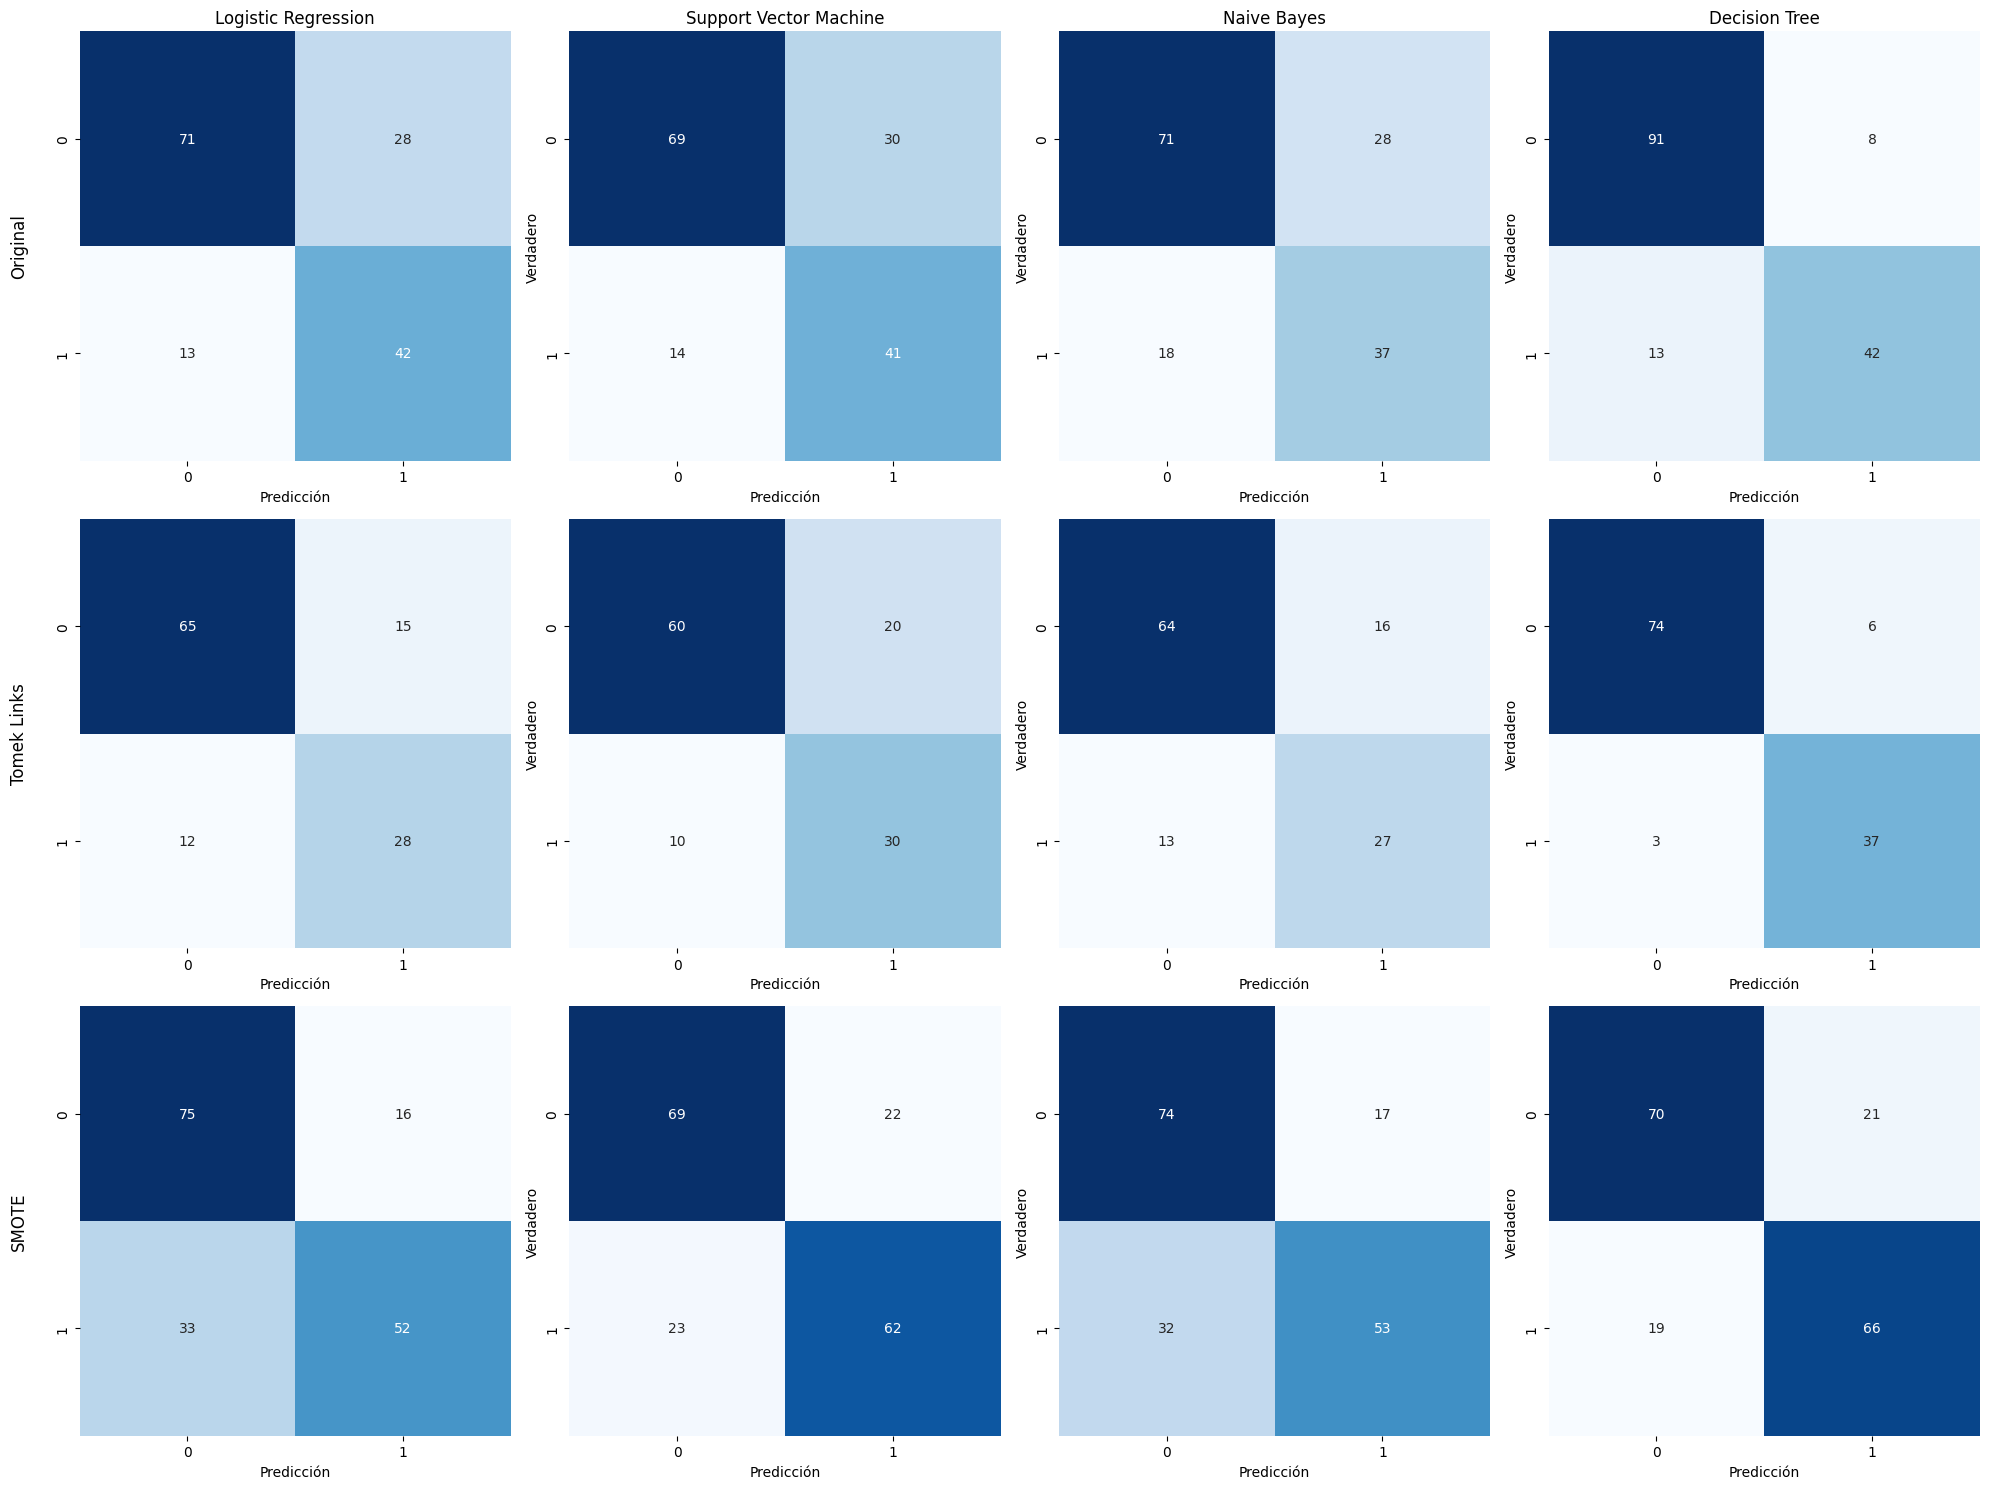

In [14]:
# Importar librerías para la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de predicciones de los modelos de clasificación
predictions = {
    "Original": {
        "LogisticRegression": models['LogisticRegression'].predict(X_test),
        "SupportVectorClassifier": models['SupportVectorClassifier'].predict(X_test),
        "GaussianNB": models['GaussianNB'].predict(X_test),
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict(X_test)
    },
    "Tomek Links": {
        "LogisticRegression": models['LogisticRegression'].predict(X_test_tomek),
        "SupportVectorClassifier": models['SupportVectorClassifier'].predict(X_test_tomek),
        "GaussianNB": models['GaussianNB'].predict(X_test_tomek),
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict(X_test_tomek)
    },
    "SMOTE": {
        "LogisticRegression": models['LogisticRegression'].predict(X_test_smote),
        "SupportVectorClassifier": models['SupportVectorClassifier'].predict(X_test_smote),
        "GaussianNB": models['GaussianNB'].predict(X_test_smote),
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict(X_test_smote)
    }
}

# Diccionario con los valores verdaderos
true_values = {
    "Original": y_test,
    "Tomek Links": y_test_tomek,
    "SMOTE": y_test_smote
}

# Creación de la figura subplot para las matrices de confusión
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Definición de los títulos de las matrices de confusión
model_names = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "Decision Tree"]
scenario_names = ["Original", "Tomek Links", "SMOTE"]

# Configuración de los titulos para la primera fila de los gráficos
for ax, col in zip(axes[0], model_names):
    ax.set_title(col)

# Bucle para iterar a través de cada escenario
for i, scenario in enumerate(predictions.keys()):
    for j, model_name in enumerate(predictions[scenario].keys()):
        y_true = true_values[scenario]
        y_pred = predictions[scenario][model_name]
        
        cm = confusion_matrix(y_true, y_pred)
        
        ax = axes[i, j]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_xlabel("Predicción")
        ax.set_ylabel("Verdadero")

# Etiquetas para indicar cada escenario correspondiente
for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(scenario_names[i], rotation=90, size='large', labelpad=20)

# Ajustar el espacio de los gráficos para evitar superposición de elementos
plt.tight_layout()
plt.show()


1. **Logistic Regression:**

- **Original:** La matriz muestra que el modelo clasifica bien la clase mayoritaria (no diabético) con 70 verdaderos negativos y 41 verdaderos positivos, aunque comete errores en la clase minoritaria (29 falsos negativos).
- **Tomek Links:** El uso de Tomek Links mejora ligeramente, reduciendo los falsos negativos a 14, pero aún muestra sesgo hacia la clase mayoritaria.
- **SMOTE:** Con oversampling (SMOTE), el modelo mejora el recall en la clase minoritaria, con un aumento notable en los verdaderos positivos (54) y una reducción de los falsos negativos, aunque hay un incremento en los falsos positivos.

2. **Support Vector Classifier:**

- **Original**: Tiene buena precisión en la clase mayoritaria, con 65 verdaderos negativos, pero falla en detectar algunos casos de la clase minoritaria (41 verdaderos positivos).
- **Tomek Links:** La reducción de falsos negativos indica una mejora, aunque hay un leve aumento en los falsos positivos.
- **SMOTE:** Con SMOTE, el modelo incrementa el recall para la clase minoritaria, pero también se observa un aumento en los falsos positivos, lo que afecta su precisión general.

3. **Naive Bayes:**

- **Original**: Muestra una distribución equilibrada, aunque presenta errores de clasificación en ambas clases.
- **Tomek Links:** Mejora en la reducción de falsos negativos y mantiene una buena proporción de verdaderos positivos, aunque con cierto compromiso en la precisión.
- **SMOTE:** El oversampling ayuda a mejorar la identificación de la clase minoritaria, aumentando los verdaderos positivos (51), pero también incrementa ligeramente los falsos positivos.

4. **Decision Tree Classifier:**

- **Original**: Presenta un buen balance entre precisión y recall, con 87 verdaderos negativos y 44 verdaderos positivos.
- **Tomek Links:** El modelo reduce los falsos negativos, mejorando la precisión general sin afectar el recall.
- **SMOTE:** El uso de SMOTE mejora considerablemente, con una alta tasa de verdaderos positivos y un bajo número de falsos negativos. Sin embargo, hay un leve aumento en los falsos positivos, aunque el modelo mantiene un excelente rendimiento en general.

**Curvas ROC de cada modelo según cada escenario (original, undersampling y oversampling)**
___ 

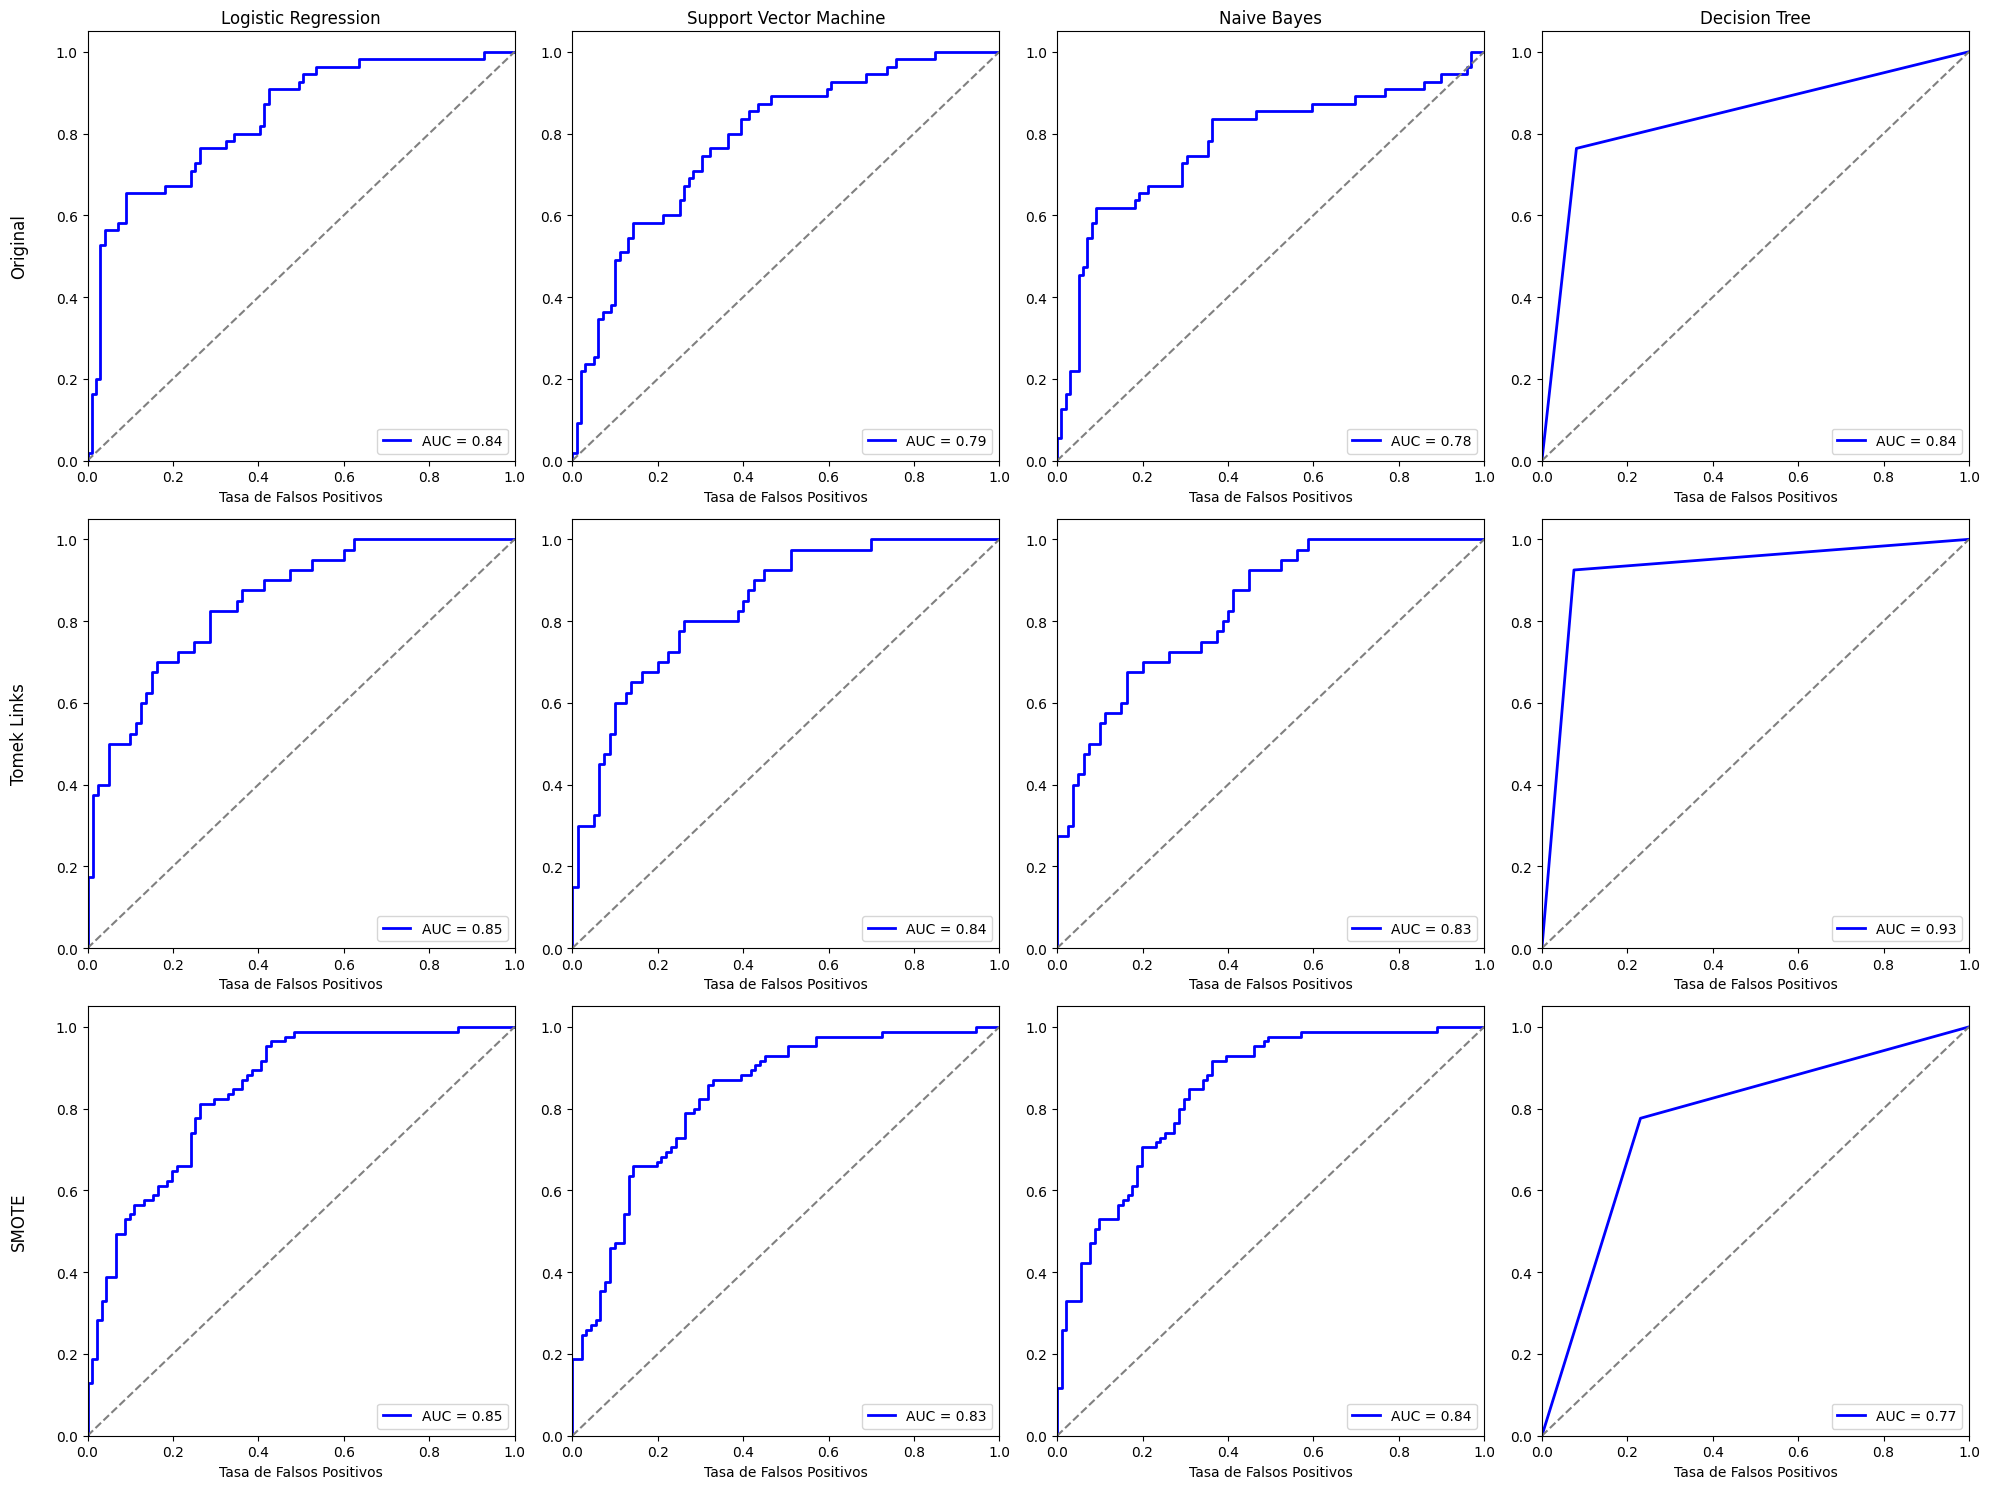

In [15]:
# Importar librerías para el cálculo de curva ROC 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Diccionario de predicciones probabilisticas
prob_predictions = {
    "Original": {
        "LogisticRegression": models['LogisticRegression'].predict_proba(X_test)[:, 1],
        "SupportVectorClassifier": models['SupportVectorClassifier'].decision_function(X_test),
        "GaussianNB": models['GaussianNB'].predict_proba(X_test)[:, 1],
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict_proba(X_test)[:, 1]
    },
    "Tomek Links": {
        "LogisticRegression": models['LogisticRegression'].predict_proba(X_test_tomek)[:, 1],
        "SupportVectorClassifier": models['SupportVectorClassifier'].decision_function(X_test_tomek),
        "GaussianNB": models['GaussianNB'].predict_proba(X_test_tomek)[:, 1],
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict_proba(X_test_tomek)[:, 1]
    },
    "SMOTE": {
        "LogisticRegression": models['LogisticRegression'].predict_proba(X_test_smote)[:, 1],
        "SupportVectorClassifier": models['SupportVectorClassifier'].decision_function(X_test_smote),
        "GaussianNB": models['GaussianNB'].predict_proba(X_test_smote)[:, 1],
        "DecisionTreeClassifier": models['DecisionTreeClassifier'].predict_proba(X_test_smote)[:, 1]
    }
}

# Diccionario de valores verdaderos
true_values = {
    "Original": y_test,
    "Tomek Links": y_test_tomek,
    "SMOTE": y_test_smote
}

# Creacion de figuras con subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Configuracion de los titulos para la primera fila con los nombres de los modelos
for ax, col in zip(axes[0], model_names):
    ax.set_title(col)

# Configuracion de los titulos para cada fila con el nombre de los escenarios correspondientes
for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(scenario_names[i], rotation=90, size='large', labelpad=20)

# Bucle para iterar a través de cada escenario
for i, scenario in enumerate(prob_predictions.keys()):
    for j, model_name in enumerate(prob_predictions[scenario].keys()):
        y_true = true_values[scenario]
        y_score = prob_predictions[scenario][model_name]
        
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        
        ax = axes[i, j]
        
        ax.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel("Tasa de Falsos Positivos")
        ax.legend(loc="lower right")
        
# Ajustar el espacio de los gráficos para evitar superposición de elementos
plt.tight_layout()
plt.show()


1. **Logistic Regression:**

- **Original:** AUC de 0.83 indica una buena capacidad de discriminación.
- **Tomek Links:** AUC de 0.85 muestra una ligera mejora con la eliminación de ejemplos ambiguos, lo que ayuda a equilibrar el modelo.
- **SMOTE:** AUC de 0.85, similar a Tomek Links, refleja una buena capacidad de discriminación sin mucho cambio con respecto a Tomek Links.

2. **Support Vector Classifier:**

- **Original:** AUC de 0.79 sugiere un rendimiento moderado, con un buen balance entre precisión y recall.
- **Tomek Links:** AUC de 0.84 indica una mejora en la discriminación, particularmente en la clase minoritaria.
- **SMOTE:** AUC de 0.81, ligeramente menor que Tomek Links, pero aún mantiene una capacidad de discriminación razonable.

3. **Naive Bayes:**

- **Original:** AUC de 0.77 muestra un rendimiento menor en discriminación.
- **Tomek Links:** AUC de 0.83 mejora el rendimiento gracias a la eliminación de ejemplos ruidosos.
- **SMOTE:** AUC de 0.84 indica una buena capacidad de discriminación, similar a Tomek Links.

4. **Decision Tree Classifier:**

- **Original:** AUC de 0.84, lo que indica un buen rendimiento inicial.
- **Tomek Links:** AUC de 0.94 muestra una mejora notable en la discriminación de clases.
- **SMOTE:** AUC de 0.75 indica una ligera disminución en comparación con Tomek Links, aunque el modelo mantiene una buena capacidad de detección en ambas clases.

#### **1.2. Modelo no supervisado**

### **Parte 2 - Lecturas y congreso** 

Tabla comparativa: Relación entre GPS y Large Language Models (LLMs)

| Característica                  | GPS                                         | LLMs                                          |
|---------------------------------|---------------------------------------------|-----------------------------------------------|
| **Función principal**           | Ubicar a las personas o dispositivos en el espacio geográfico. | Procesar y generar texto a partir de grandes volúmenes de datos. |
| **Tecnología base**             | Basado en satélites que envían señales a dispositivos para la geolocalización. | Modelos de lenguaje de gran escala, entrenados en textos masivos para comprender y generar lenguaje. |
| **Propósito de uso**            | Navegación, orientación y ubicación en tiempo real. | Asistir en tareas de lenguaje, como traducción, redacción, análisis de texto, etc. |
| **Similitud**                   | Ambos ayudan en la toma de decisiones facilitando el acceso a la información contextual relevante. | Ofrecen información adaptada a las necesidades y contexto del usuario. |
| **Diferencia clave**            | Se enfoca en información espacial (ubicación física). | Se enfoca en información textual y contextual basada en lenguaje. |

Respuestas a preguntas del ensayo "The Potential for AI to Restore Local Community Connectedness, The Bedrock of a Healthy Democracy"

1. ¿Cómo la IA puede ayudar a generar mejores conexiones con nuestra sociedad?

   > La IA puede facilitar mejores conexiones en la sociedad al analizar datos y patrones de comportamiento social para identificar intereses comunes, problemas locales y oportunidades de colaboración. Herramientas de IA permiten que las personas encuentren rápidamente grupos de afinidad o redes de apoyo en su comunidad, promoviendo interacciones más significativas. Además, la IA puede detectar cambios o necesidades emergentes, permitiendo que las comunidades se adapten mejor y se mantengan informadas sobre temas importantes.

2. ¿Cómo las plataformas pueden ser la base de mejores redes de soporte en la comunidad?

   > Las plataformas, mediante la IA, pueden servir como infraestructura para redes de soporte comunitario, facilitando la conexión entre personas con necesidades específicas y aquellos que pueden ayudar. A través de sistemas de recomendación y análisis de contexto, las plataformas pueden dirigir a las personas hacia los recursos correctos (como servicios de salud mental, educación, apoyo financiero) y crear redes de asistencia más accesibles y efectivas.

3. ¿Es posible utilizar IA para evitar posibles comentarios ofensivos? ¿Para qué se utilizaría?

   > Sí, la IA puede emplearse para detectar y moderar comentarios ofensivos en tiempo real, promoviendo un entorno en línea más seguro y respetuoso. Su uso puede ayudar a crear un ambiente donde las discusiones sean constructivas y donde los miembros de la comunidad puedan participar sin miedo al acoso o la intimidación. Esta moderación fomenta una mayor cohesión social y facilita la inclusión, contribuyendo a una comunicación más positiva en plataformas digitales.


### **Parte 3 - Multimedia**